## Scenario
Suppose:
A classifier that predicts 3 animal classes:

🐱 0 = Cat

🐶 1 = Dog

🐰 2 = Rabbit

for multiclass we take extra column and row that is **Total**.
We calculate seprately for each class precision, recall and f1 score and then calculate macro or weighted average.



## Formulas
In multi-class, you treat one class at a time as the “positive” class, and all others as “negative.”

So for class i:

**True Positives (TPₖ):** Number of samples correctly predicted as class k.

**False Positives (FPₖ):** Number of samples predicted as class k but actually belong to another class.

**False Negatives (FNₖ):** Number of samples that actually belong to class k but were predicted as another class.


##### Precision for class k

Precisionk=TPk/TPk+FPk
​
##### Recall for class k

Recallk=TPk/TPk+FNk

##### F1 Score for class k
F1k=2×Precisionk×Recallk/Precisionk+Recallk
​
​

## Macro Average
The macro average is the unweighted mean of the per-class scores:
          Precisionmacro=1/N∑Precisionk
​
Same for recall nad f1 score.
where N = number of classes

## Weighted Average
The weighted average takes into account how many true samples there are for each class:

Let:

supportₖ = number of true samples of class k
 Precisionweighted=1/∑supportk*∑(supportk×Precisionk)
​
 
​Same for recall nad f1 score.
  


## For Cats (Class 0)
 True Cats: 0,1,2 → 3 Cats
 Predicted Cats: 0,1,7 → 3 predicted as Cats

Correct Cat predictions: index 0,1 → 2 correct → TP = 2

#### Cat mistakes:

index 2 → true Cat but predicted Dog → FN for Cat

index 7 → true Rabbit but predicted Cat → FP for Cat

So:

TP (Cat) = 2

FP (Cat) = 1 (the Rabbit wrongly marked Cat)

FN (Cat) = 1 (the Cat wrongly marked Dog)

👉 Precision (Cat) = TP / (TP + FP) = 2 / (2+1) = 2/3 ≈ 0.67
👉 Recall (Cat) = TP / (TP + FN) = 2 / (2+1) = 2/3 ≈ 0.67

## For Dogs (Class 1)
 True Dogs: 3,4,5 → 3 Dogs
 Predicted Dogs: 2,3,4 → 3 predicted as Dogs

Correct Dog predictions: index 3,4 → TP = 2

#### Dog mistakes:

index 2 → true Cat but predicted Dog → FP for Dog

index 5 → true Dog but predicted Rabbit → FN for Dog

So:

TP (Dog) = 2

FP (Dog) = 1 (Cat wrongly marked Dog)

FN (Dog) = 1 (Dog wrongly marked Rabbit)

👉 Precision (Dog) = 2/3 ≈ 0.67
👉 Recall (Dog) = 2/3 ≈ 0.67

## For Rabbits (Class 2)
 True Rabbits: 6,7,8 → 3 Rabbits
 Predicted Rabbits: 5,6,8 → 3 predicted as Rabbits

Correct Rabbit predictions: index 6,8 → TP = 2

#### Rabbit mistakes:

index 5 → true Dog but predicted Rabbit → FP for Rabbit

index 7 → true Rabbit but predicted Cat → FN for Rabbit

So:

TP (Rabbit) = 2

FP (Rabbit) = 1 (Dog wrongly marked Rabbit)

FN (Rabbit) = 1 (Rabbit wrongly marked Cat)

👉 Precision (Rabbit) = 2/3 ≈ 0.67
👉 Recall (Rabbit) = 2/3 ≈ 0.67

**Macro Precision** = 0.67+0.67+0.67/3≈0.67

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Classes: 0 = Cat, 1 = Dog, 2 = Rabbit
y_true = [0, 0, 0, 1, 1, 1, 2, 2, 2]
y_pred = [0, 0, 1, 1, 1, 2, 2, 0, 2]

In [2]:
# Macro average: unweighted mean
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

In [3]:
# Weighted average: takes support (number of true instances) into account
precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

In [4]:
print(f"Macro Precision: {precision_macro:.2f}")
print(f"Macro Recall: {recall_macro:.2f}")
print(f"Macro F1 Score: {f1_macro:.2f}")

Macro Precision: 0.67
Macro Recall: 0.67
Macro F1 Score: 0.67


In [5]:
print(f"Weighted Precision: {precision_weighted:.2f}")
print(f"Weighted Recall: {recall_weighted:.2f}")
print(f"Weighted F1 Score: {f1_weighted:.2f}")

Weighted Precision: 0.67
Weighted Recall: 0.67
Weighted F1 Score: 0.67


In [6]:
# Detailed breakdown for each class
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Cat", "Dog", "Rabbit"]))


Classification Report:

              precision    recall  f1-score   support

         Cat       0.67      0.67      0.67         3
         Dog       0.67      0.67      0.67         3
      Rabbit       0.67      0.67      0.67         3

    accuracy                           0.67         9
   macro avg       0.67      0.67      0.67         9
weighted avg       0.67      0.67      0.67         9



## Complete Example

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix



In [5]:
# Example imbalanced dataset:
# 90 Cats (0), 5 Dogs (1), 5 Rabbits (2)

y_true = (
    [0]*90 +  # Cats
    [1]*5 +   # Dogs
    [2]*5     # Rabbits
)



 


In [6]:
# Model:
# - Cats: perfect
# - Dogs: 3 correct, 2 wrong as Cats
# - Rabbits: all wrong as Cats

y_pred = (
    [0]*90 +          # Cats: all correct
    [1]*3 + [0]*2 +   # Dogs: 3 correct, 2 as Cats
    [0]*5             # Rabbits: all as Cats
)

In [7]:
# Per-class, macro, weighted
precision_per_class = precision_score(y_true, y_pred, average=None, labels=[0,1,2])
recall_per_class = recall_score(y_true, y_pred, average=None, labels=[0,1,2])
f1_per_class = f1_score(y_true, y_pred, average=None, labels=[0,1,2])

macro_f1 = f1_score(y_true, y_pred, average='macro')
weighted_f1 = f1_score(y_true, y_pred, average='weighted')


c:\Users\Eden Computers\Desktop\ML Folder\venv2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
print("Per-class F1:", f1_per_class)
print("Macro F1:", macro_f1)
print("Weighted F1:", weighted_f1)
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Cat", "Dog", "Rabbit"]))


Per-class F1: [0.96256684 0.75       0.        ]
Macro F1: 0.570855614973262
Weighted F1: 0.9038101604278075

Classification Report:

              precision    recall  f1-score   support

         Cat       0.93      1.00      0.96        90
         Dog       1.00      0.60      0.75         5
      Rabbit       0.00      0.00      0.00         5

    accuracy                           0.93       100
   macro avg       0.64      0.53      0.57       100
weighted avg       0.89      0.93      0.90       100

c:\Users\Eden Computers\Desktop\ML Folder\venv2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Eden Computers\Desktop\ML Folder\venv2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision i

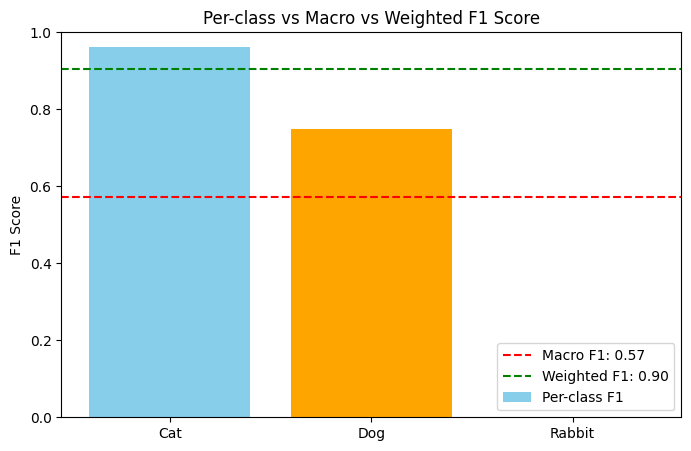

In [9]:
classes = ["Cat", "Dog", "Rabbit"]

plt.figure(figsize=(8, 5))
plt.bar(classes, f1_per_class, color=["skyblue", "orange", "pink"], label='Per-class F1')
plt.axhline(macro_f1, color='red', linestyle='--', label=f'Macro F1: {macro_f1:.2f}')
plt.axhline(weighted_f1, color='green', linestyle='--', label=f'Weighted F1: {weighted_f1:.2f}')
plt.title("Per-class vs Macro vs Weighted F1 Score")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.legend()
plt.show()

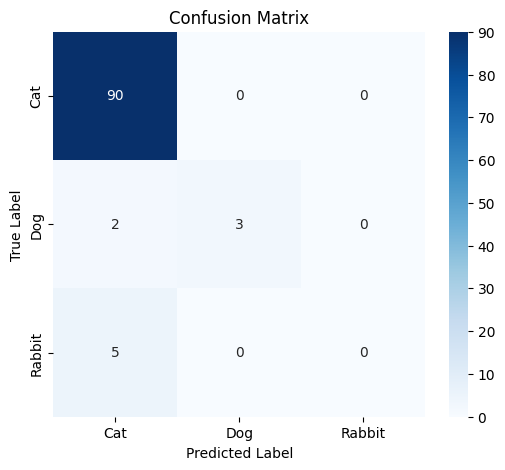

In [10]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()